Project Task:

Image Classification of Florida Wildlife. 


Image dataset comes from UCF's Florida Wildlife Camera Traps Dataset:
https://www.crcv.ucf.edu/research/projects/florida-wildlife-camera-trap-dataset/




Progress Report:

There were problems with the dataset size. Downloading all five parts of the dataset left me with 16 GB of space. For Capstone Checkpoint 3, this is an initial binary classification model using the Bobcats and Panthers classes and performing accuracy, precision, and recall metrics on the model.

I intend to include three more classes in future models to make this a multi classification model. 

Even with Google Colab's GPU the model was taking a while to train, so I cut the epochs down 3 for the sake of time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
drive.mount('/content/drive')
np.random.seed(42)

Mounted at /content/drive


In [5]:
train_gen = ImageDataGenerator(rescale=1/255)
test_gen = ImageDataGenerator(rescale=1/255)

In [6]:
train = train_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/train',
    target_size=(256,256),
    subset='training',
    class_mode = 'binary'
    )
test = test_gen.flow_from_directory(
    '/content/drive/MyDrive/Wildlife Capstone/wildlife_data/test',
    target_size=(256,256),
    subset='training',
    class_mode = 'binary'
    )

Found 3542 images belonging to 2 classes.
Found 754 images belonging to 2 classes.


In [7]:
train.class_indices

{'Bobcats': 0, 'Panthers': 1}

In [8]:
basemodel = Sequential()
basemodel.add(Conv2D(16, (3,3), activation='relu', input_shape=(256,256,3)))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Conv2D(32, (3,3), activation='relu'))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Conv2D(64, (3,3), activation='relu'))
basemodel.add(MaxPooling2D(pool_size=(2,2)))
basemodel.add(Flatten())
basemodel.add(Dense(512, activation='relu'))
basemodel.add(Dense(1, activation='sigmoid'))

In [9]:
basemodel.compile(
    optimizer='adam',
    loss='bce',
    metrics=['accuracy', 'Precision', 'Recall'])

In [12]:
history = basemodel.fit(train, validation_data = test, epochs=3, verbose=1)

Epoch 1/3
111/111 [==============================] - 813s 7s/step - loss: 0.6181 - accuracy: 0.6525 - precision: 0.6585 - recall: 0.7440 - val_loss: 0.5463 - val_accuracy: 0.6936 - val_precision: 0.6624 - val_recall: 0.8125
Epoch 2/3
111/111 [==============================] - 183s 2s/step - loss: 0.4045 - accuracy: 0.8114 - precision: 0.8225 - recall: 0.8311 - val_loss: 0.5821 - val_accuracy: 0.6963 - val_precision: 0.6529 - val_recall: 0.8620
Epoch 3/3
111/111 [==============================] - 180s 2s/step - loss: 0.2656 - accuracy: 0.8806 - precision: 0.8871 - recall: 0.8931 - val_loss: 0.6859 - val_accuracy: 0.7255 - val_precision: 0.6781 - val_recall: 0.8776


In [13]:
history.history

{'accuracy': [0.6524562239646912, 0.8114059567451477, 0.880575954914093],
 'loss': [0.6180945038795471, 0.4045083820819855, 0.265580952167511],
 'precision': [0.6585140824317932, 0.8224974274635315, 0.8871051073074341],
 'recall': [0.7440041899681091, 0.831074059009552, 0.8931178450584412],
 'val_accuracy': [0.6936339735984802, 0.6962864995002747, 0.7254641652107239],
 'val_loss': [0.5462769865989685, 0.5821450352668762, 0.6858850121498108],
 'val_precision': [0.662420392036438, 0.6528599858283997, 0.6780683994293213],
 'val_recall': [0.8125, 0.8619791865348816, 0.8776041865348816]}

Text(0.5, 1.0, 'Validation Metrics From Test Set')

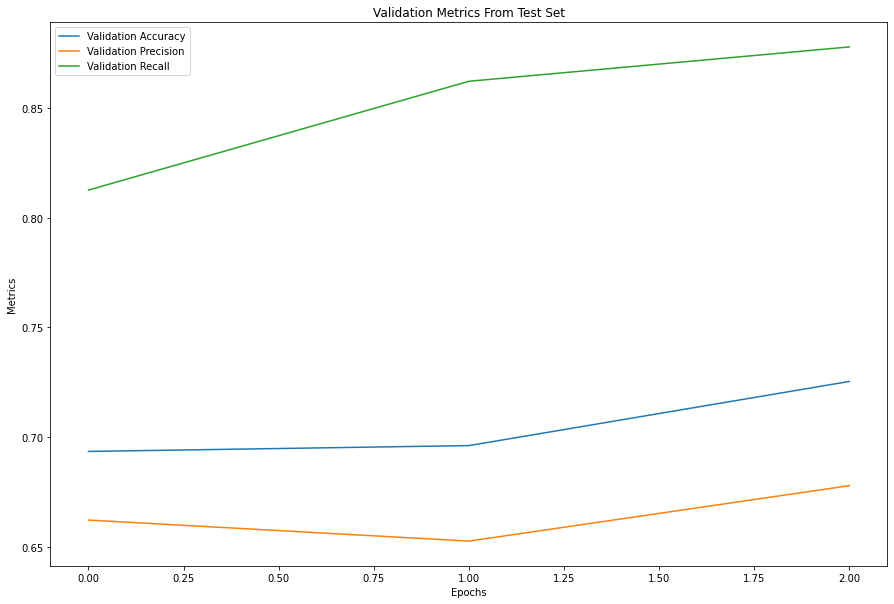

In [14]:
plt.figure(figsize=(15,10))
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_precision'], label='Validation Precision')
plt.plot(history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.legend()
plt.title('Validation Metrics From Test Set')

Code Credit (so far):

7.05 Lesson CNNs 
  - Processing Images
  - CNN

https://keras.io/examples/vision/image_classification_from_scratch/

https://www.tensorflow.org/tutorials/images/classification
